In [1]:
from Learners import GreedyLearner
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(5)


In [2]:
initial_value = 1
epsilon = 0.1
alpha = 0.1

stdev = 0.1


num_arms = 10
rounds = 10_000
num_tests = 500

In [3]:

learners = [(GreedyLearner, {'rounds': rounds, 'num_arms': num_arms, 'initial_value': initial_value,
                             'epsilon': epsilon}),
            (GreedyLearner, {'rounds': rounds, 'num_arms': num_arms, 'initial_value': initial_value,
                             'epsilon': epsilon, 'alpha': alpha})
                            ]
scores = [np.empty((num_tests, rounds)) for _ in range(len(learners))]


for i in range(num_tests):


    normals = np.random.normal(size=(rounds, num_arms), scale=stdev)
    normals[0] = np.zeros(num_arms)

    testbed_means = np.cumsum(normals, axis=0)
    testbed = np.random.normal(loc=testbed_means, size=(rounds, num_arms))

    for idx, (learner_class, kwargs) in enumerate(learners):

        learner = learner_class(testbed=testbed, **kwargs)
        learner.learn()
        scores[idx][i] = learner.rewards



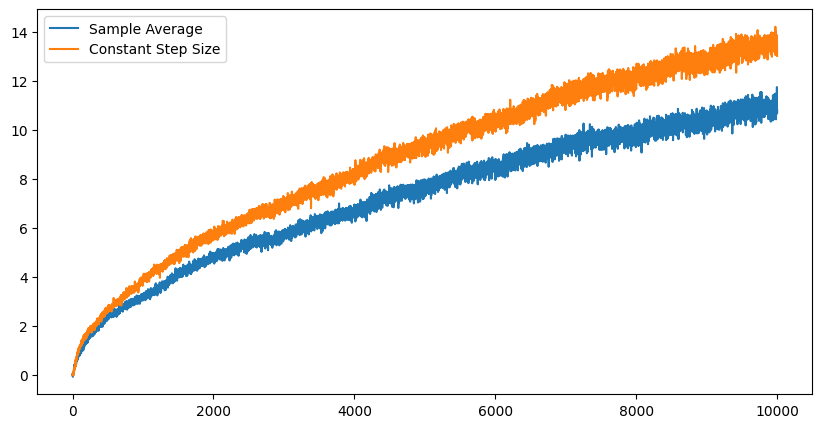

In [4]:

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(np.mean(scores[0], axis=0), label='Sample Average')
ax.plot(np.mean(scores[1], axis=0), label='Constant Step Size')
plt.legend()
plt.show()